<a href="https://colab.research.google.com/github/crywolfe/fingerprinting/blob/master/personal_assignment_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CIS-700
### Personal Assignments
#### Gerry Wolfe

I've selected the following kaggle dataset.

https://www.kaggle.com/ruizgara/socofing
This dataset contains 6000 fingerprints from 600 subjects. Each subject has a set of 10 fingerprints in BMP format.
The file names in the dataset have the following schema. <subjectId>_<gender>_<leftOrRightHand>_<fingerType>.BMP

My goal is to predict whether a given set of fingerprints are male or female.

In [ ]:
# from google.colab import files
# files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"crywolfe","key":"b38faf08d1436dc0ce5df66dc182c6ff"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install pickle5
# libraries
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
import seaborn as sn
import matplotlib.pyplot as plt
import IPython.display as display
import pandas as pd
import numpy as np
import pathlib
from PIL import Image
from sklearn.model_selection import train_test_split
import os # use this instead of pathlib?
import cv2
import pickle5 as pickle
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d ruizgara/socofing
# !unzip socofing.zip  -d /content/

In [ ]:
# !cd SOCOFing/
# !pwd

/content


#### load project

In [ ]:
# # data_dir = tf.keras.utils.get_file(origin='//Users/imac2017/Downloads/CIS-700/Notebooks/signature-verification-dataset.zip', fname='signature-verification-dataset', extract=True)
# data_dir = pathlib.Path('/content/SOCOFing/')
# data_dir.glob('*/*')
# image_count = len(list(data_dir.glob('*/*.BMP')))
# image_count
# # data_dir = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

6000

In [ ]:
# CLASS_NAMES = np.array([item.name for item in data_dir.glob('*')])
# CLASS_NAMES

array(['Altered', 'Real'], dtype='<U7')

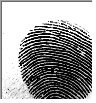

/content/SOCOFing/Real/88__F_Right_middle_finger.BMP


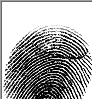

/content/SOCOFing/Real/238__M_Left_little_finger.BMP


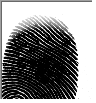

/content/SOCOFing/Real/16__M_Right_index_finger.BMP


In [ ]:
# real = list(data_dir.glob('Real/*'))
# for image_path in real[0:3]:
#     display.display(Image.open(str(image_path)))
#     print(image_path)

In [ ]:
# # pickle write real
# import datetime

# date_of_launch = str(datetime.date.today())
# fileObject = open('/content/drive/My Drive/CIS-700/Final/pickled_real' + date_of_launch + '.pickle', 'wb')
# pickle.dump(real, fileObject)
# fileObject.close()

In [ ]:
# # pickle read real
# fileObject = open('/content/drive/My Drive/CIS-700/Final/pickled_real2020-06-06.pickle', 'rb')
# real = pickle.load(fileObject)
# fileObject.close()
# real

### Extract Labels From File Names
The labels I want are located in the file name of each image.

I'm choosing to use labels for the type of finger, namely, thumb, index finger, middle finger, ring finger, and pinky finger.

Maybe for another project I will choose to train against gender.

In [ ]:
# def extract_label(image_path, train=True):
#     filename, _ = os.path.splitext(os.path.basename(image_path))
#     subject_id, remaining = filename.split('__')
    
#     if train:
#         gender, hand, finger, _, _ = remaining.split('_')
#     else:
#         gender, hand, finger, _ = remaining.split('_')
    
#     gender = 0 if gender == 'M' else 1
#     hand = 0 if hand == 'Left' else 1
    
#     if finger == 'thumb':
#         finger = 0
#     elif finger == 'index':
#         finger = 1
#     elif finger == 'middle':
#         finger = 2
#     elif finger == 'ring':
#         finger = 3
#     elif finger == 'little':
#         finger = 4
#     # print(np.array([subject_id, gender, hand, finger], dtype=np.uint16))      
#     return np.array([subject_id, gender, hand, finger], dtype=np.uint16)

#### loading specific data


In [ ]:
# img_size = 96

# def loading_data(path,train):
#     print("loading data from: ", path)
#     data = []
#     for img in os.listdir(path):
#         try:
#             img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
#             img_resize = cv2.resize(img_array, (img_size, img_size))
#             label = extract_label(os.path.join(path, img),train)
#             # data.append([label[0], img_resize ]) # appends label feature of finger
#             data.append([label[1], img_resize ]) # appends label feature of gender
#         except Exception as e:
#             pass
#     # data
#     return data

In [ ]:
# real_path = "/content/SOCOFing/Real"
# easy_path = "/content/SOCOFing/Altered/Altered-Easy"
# medium_path = "/content/SOCOFing/Altered/Altered-Medium"
# hard_path = "/content/SOCOFing/Altered/Altered-Hard"

# easy_data = loading_data(easy_path, train = True)
# medium_data = loading_data(medium_path, train = True)
# hard_data = loading_data(hard_path, train = True)
# test = loading_data(real_path, train = False)
# print(test[0])
# data = np.concatenate([easy_data, medium_data, hard_data], axis=0)
# print(data[0])
# # del easy_data, medium_data, hard_data # to save some RAM

loading data from:  /content/SOCOFing/Altered/Altered-Easy
loading data from:  /content/SOCOFing/Altered/Altered-Medium
loading data from:  /content/SOCOFing/Altered/Altered-Hard
loading data from:  /content/SOCOFing/Real


In [ ]:
# # pickle write test

# date_of_launch = str(datetime.date.today())
# fileObject = open('/content/drive/My Drive/CIS-700/Final/pickled_test' + date_of_launch + '.pickle', 'wb')
# pickle.dump(test, fileObject)
# fileObject.close()

In [ ]:
# pickle read test
fileObject = open('/content/drive/My Drive/CIS-700/Final/pickled_test2020-06-06.pickle', 'rb')
test = pickle.load(fileObject)
fileObject.close()
test[1] # if gender label then test[1] is a male 0. (I THINK. Double check)

[0, array([[160, 158, 158, ...,   0,   0,   0],
        [160, 105, 121, ...,   0,   0,   0],
        [160, 105, 255, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)]

In [ ]:
# # pickle write data

# date_of_launch = str(datetime.date.today())
# fileObject = open('/content/drive/My Drive/CIS-700/Final/pickled_data' + date_of_launch + '.pickle', 'wb')
# pickle.dump(data, fileObject)
# fileObject.close()

In [ ]:
# pickle read data
fileObject = open('/content/drive/My Drive/CIS-700/Final/pickled_data2020-06-06.pickle', 'rb')
data = pickle.load(fileObject)
fileObject.close()
data[1] # if gender label then data[1] is a male 0.

array([0,
       array([[160, 158, 158, ...,   0,   0,   0],
       [160, 105, 121, ...,   0,   0,   0],
       [160, 105, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)], dtype=object)

#### Preprocess Data

#### Training Data

In [ ]:
# img_size = 96

# # finger_labels = []
# gender_labels = []
# images = []

# for label, feature in data:
#     images.append(feature)
#     # fingers_label.append(label)
#     gender_labels.append(label)
    
# # del data # to save RAM

# images = np.array(images).reshape(-1, img_size, img_size, 1)
# images_2 = np.array(images).reshape(-1, img_size, img_size)
# images_2_norm = images_2 / 255.0
# images_norm = images / 255.0
# # images_norm_keras = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# # fingers_category = keras.utils.to_categorical(finger_labels, num_classes=5) # converts to one-hot encoding
# gender_category = keras.utils.to_categorical(gender_labels, num_classes=2)
# gender_category

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
# # pickle write images_norm

# date_of_launch = str(datetime.date.today())
# fileObject = open('/content/drive/My Drive/CIS-700/Final/pickled_images_norm' + date_of_launch + '.pickle', 'wb')
# pickle.dump(images_norm, fileObject)
# fileObject.close()

In [ ]:
# pickle read images_norm
fileObject = open('/content/drive/My Drive/CIS-700/Final/pickled_images_norm2020-06-07.pickle', 'rb')
images_norm = pickle.load(fileObject)
fileObject.close()
images_norm

array([[[[0.62745098],
         [0.61960784],
         [0.61960784],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.62745098],
         [0.41176471],
         [0.4745098 ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.62745098],
         [0.41176471],
         [1.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.62745098],
         [0.61960784],
         [0.61

In [ ]:
# # pickle write gender_category

# date_of_launch = str(datetime.date.today())
# fileObject = open('/content/drive/My Drive/CIS-700/Final/pickled_gender_category' + date_of_launch + '.pickle', 'wb')
# pickle.dump(gender_category, fileObject)
# fileObject.close()

In [ ]:
# pickle read gender_category
fileObject = open('/content/drive/My Drive/CIS-700/Final/pickled_gender_category2020-06-06.pickle', 'rb')
gender_category = pickle.load(fileObject)
fileObject.close()
gender_category

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
print(images_2_norm[0].shape)
print(images_2.shape)
print(images_norm.shape)

(96, 96)
(49270, 96, 96)
(49270, 96, 96, 1)


#### Test data

In [ ]:
# img_size = 96

# images_test = []
# # finger_labels_test = []
# gender_labels_test = []

# for label, feature in test:
#     images_test.append(feature)
#     # finger_labels_test.append(label)
#     gender_labels_test.append(label)
    
# del test # to save ram

# images_test = np.array(images_test).reshape(-1, img_size, img_size, 1)
# images_2_test = np.array(images).reshape(-1, img_size, img_size)
# images_2_test_norm = images_2_test / 255.0
# images_norm_test = images_test / 255.0
# # fingers_category_test = keras.utils.to_categorical(finger_labels_test, num_classes = 5)
# gender_category_test = keras.utils.to_categorical(gender_labels_test, num_classes=2)
# gender_category_test

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
# # pickle write gender_category_test

# date_of_launch = str(datetime.date.today())
# fileObject = open('/content/drive/My Drive/CIS-700/Final/pickled_gender_category_test' + date_of_launch + '.pickle', 'wb')
# pickle.dump(gender_category_test, fileObject)
# fileObject.close()

In [ ]:
# pickle read gender_category_test
fileObject = open('/content/drive/My Drive/CIS-700/Final/pickled_gender_category_test2020-06-06.pickle', 'rb')
gender_category_test = pickle.load(fileObject)
fileObject.close()
gender_category_test

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
# sklearn method specifically designed to split data into train and test sets randomly and by percentage

# fingers target
# images_train, images_validation, fingers_train, fingers_validation = train_test_split(
#     images_norm, fingers_category, test_size=0.2, random_state=1)

#gender target
images_train, images_validation, gender_train, gender_validation = train_test_split(
    images_norm, gender_category, test_size=0.2, random_state=1) # 80/20 split

In [ ]:
print(f'Full data:   {images_norm.shape}')
print("Train:      ",images_train.shape)
print("Validation: ",images_validation.shape)
print("Test:       ",images_norm_test.shape)

Full data:   (49270, 96, 96, 1)
Train:       (39416, 96, 96, 1)
Validation:  (9854, 96, 96, 1)
Test:        (6000, 96, 96, 1)


#### Principal Component Analysis

In [ ]:
# feature correlation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(images_2_norm[0])
# Apply transform to both the training set and the test set.
train_img = scaler.transform(images_2_norm[0])

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model with 90% variance
pca = PCA(.90)
# pca_100 = PCA(.9999999999)

In [ ]:
pca.fit(images_2_norm[0])
# pca_100.fit(images_2_norm[0])
variance = pca.explained_variance_ratio_
# variance_100 = pca_100.explained_variance_ratio_
print(len(variance))
# print(len(variance_100))

22


In [ ]:
print(variance)
# print(variance_100)
# then feature reduction to drop
print(sum(variance))

[0.4266861  0.05111918 0.0500476  0.04583803 0.03904587 0.03550169
 0.03077492 0.02612149 0.02336733 0.02186439 0.02099471 0.01725987
 0.01596465 0.0154915  0.01352779 0.01330078 0.01160045 0.0108228
 0.00980883 0.0088073  0.00843005 0.00791017]
0.9042855088807659


In [ ]:
column_variance = images_2_norm.var(axis=0)
column_variance

array([[2.22731227e-04, 2.33211279e-04, 2.33211279e-04, ...,
        1.35349273e-03, 1.47563955e-04, 9.75729009e-06],
       [2.33211279e-04, 2.39487264e-03, 2.09890825e-03, ...,
        7.71054792e-03, 5.40746607e-04, 4.33657337e-06],
       [1.64910248e-04, 2.71035836e-03, 1.35129667e-06, ...,
        7.52877321e-03, 5.57008758e-04, 0.00000000e+00],
       ...,
       [1.63601903e-03, 5.45419052e-03, 6.06492577e-03, ...,
        6.39044863e-03, 4.79234458e-04, 1.52936748e-06],
       [1.96146440e-03, 6.05867440e-03, 5.98638553e-03, ...,
        6.80593884e-03, 5.88656645e-04, 4.38265269e-07],
       [8.42292206e-09, 2.80866698e-09, 5.61630766e-09, ...,
        0.00000000e+00, 1.12285102e-08, 0.00000000e+00]])

In [ ]:
# for i in range(96):
#   if sum(column_variance[i]) > 1:
#     print(f'{i} -> {sum(column_variance[i])}')

### Mutual Information and Information Gain


#### Model
I've created three different models.

Each of the cells below creates the model and also handles the correlation which is the convolution. In other words, convolution in a neural network is correlation.

For the first model, in trying to optimize the model based on the training, I created three layers.

The first layer has two convolutions, one max pool and one dropout to try to manage the input.

The second layer, I do the same thing except I create a doubly wide set of filters.

In the third layer, I flatten the data out and use Dense to finalize the data and bring the data into the five finger type categories.

For the second model, I'm using a different activation function selu instead of relu and a different type of pooling classifier. What I noticed is that model 2 is more efficient, faster, and even more accurate than model 1 even though my density classifier is half as much as in the first model.

The third model is self-explanatory.


In [ ]:
model = tf.keras.Sequential() # instantiates a stack of sequential layers.

# Layer 1 - Input Layer
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', 
                activation='relu', input_shape=(96,96,1)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', 
                activation='relu', input_shape=(96,96,1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

# Layer 2 - Hidden Layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', 
                activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))

# Layer 3 - Output Layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation="relu")) # without this I get 99.90 but the graph is jumpier.
model.add(tf.keras.layers.Dropout(0.25))
# model.add(tf.keras.layers.Dense(5, activation="softmax"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 96, 96, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 96, 96, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 64)       

The model summary above shows the correlation (the convolutions) and all the classifiers used in the model.

The output shape shows that the shape of the image is reduced at each layer from 96 X 96 to 48 X 48 to 24 X 24, but at the same time increasing the filters from 1 to 32 to 64 to 36864 to 100 to 5 which represent the output label classifiers.

It is training a total of 3,731,965 values in the model above.

The model below will do something similar but I changed the correlation and classifiers to show a difference.

In Model 2 I am using a exponential activating function called selu, an average pooling layer and spatial dropout.

In [ ]:
# Second model
model2 = tf.keras.Sequential() # instantiates a stack of sequential layers.

# Layer 1 - Input Layer
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', 
                activation =tf.nn.selu, input_shape = (96,96,1))) # Using a different activation function called selu
model2.add(tf.keras.layers.AvgPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.SpatialDropout2D(0.20))

# Layer 2 - Hidden Layer
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', 
                activation=tf.nn.selu))
model2.add(tf.keras.layers.AvgPool2D(pool_size=(2,2)))
model2.add(tf.keras.layers.SpatialDropout2D(0.20))

# Layer 3 - Output Layer
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(50, activation=tf.nn.selu))
model2.add(tf.keras.layers.Dropout(0.25))
# model2.add(tf.keras.layers.Dense(5, activation="softmax"))
model2.add(tf.keras.layers.Dense(2, activation="softmax"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
average_pooling2d (AveragePo (None, 48, 48, 32)        0         
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 24, 24, 64)        0         
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)            

In [ ]:
# Third model
model3 = tf.keras.Sequential() # instantiates a stack of sequential layers.

# Layer 1 - Input Layer
model3.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', 
                activation ="relu", input_shape = (96,96,1))) # Using a different activation function called selu
model3.add(tf.keras.layers.AvgPool2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Dropout(0.20))

# Layer 2 - Hidden Layer
model3.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', 
                activation="relu"))
model3.add(tf.keras.layers.AvgPool2D(pool_size=(2,2)))
model3.add(tf.keras.layers.Dropout(0.20))

# Layer 3 - Output Layer
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(50, activation="relu"))
model3.add(tf.keras.layers.Dropout(0.20))
# model3.add(tf.keras.layers.Dense(5, activation="softmax"))
model3.add(tf.keras.layers.Dense(2, activation="sigmoid"))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 96, 96, 64)        640       
_________________________________________________________________
average_pooling2d_2 (Average (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 128)       73856     
_________________________________________________________________
average_pooling2d_3 (Average (None, 24, 24, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 73728)            

Below, I train two different models.

I could have used more epochs (e.g. 20+ instead of 12) but when looking at the accuracy, the extra time was not worth the minimal gain in accuracy from approximately 95% to 99%.

Each epoch in model 1 took about 60 seconds to complete, whereas each epoch in model 2 took about 30 seconds for a similar result.



In [ ]:
#For Model 1
epochs = 6 # 20+ gets me an accuracy in the 99.8% range but it takes much longer to train even with a GPU.
batch_size = 34
model_path = '/content/drive/My Drive/CIS-700/Final/Model_1.h5' #.Model_1.h5

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

# Set a learning rate
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1),
    tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.0001, verbose=1)
]

# history = model.fit(images_train, fingers_train, batch_size=batch_size, epochs=epochs, 
#                     validation_data = (images_validation, fingers_validation), verbose = 1, callbacks=callbacks)

history = model.fit(images_train, gender_train, batch_size=batch_size, epochs=epochs, 
                    validation_data = (images_validation, gender_validation), verbose = 1, callbacks=callbacks)
tf.keras.backend.clear_session()

Epoch 1/6
1160/1160 [==============================] - ETA: 0s - loss: 0.4562 - accuracy: 0.8009
Epoch 00001: val_accuracy improved from -inf to 0.81530, saving model to /content/drive/My Drive/CIS-700/Final/Model_1.h5
1160/1160 [==============================] - 15s 13ms/step - loss: 0.4562 - accuracy: 0.8009 - val_loss: 0.4348 - val_accuracy: 0.8153 - lr: 0.0010
Epoch 2/6
1156/1160 [============================>.] - ETA: 0s - loss: 0.3751 - accuracy: 0.8328
Epoch 00002: val_accuracy improved from 0.81530 to 0.88451, saving model to /content/drive/My Drive/CIS-700/Final/Model_1.h5
1160/1160 [==============================] - 14s 12ms/step - loss: 0.3750 - accuracy: 0.8328 - val_loss: 0.3114 - val_accuracy: 0.8845 - lr: 0.0010
Epoch 3/6
1156/1160 [============================>.] - ETA: 0s - loss: 0.2408 - accuracy: 0.8998
Epoch 00003: val_accuracy improved from 0.88451 to 0.96255, saving model to /content/drive/My Drive/CIS-700/Final/Model_1.h5
1160/1160 [==============================

In [ ]:
# For Model 2
epochs = 6 # 20+ gets me an accuracy in the 99.8% range but it takes much longer to train even with a GPU.
batch_size = 34
model_path = '/content/drive/My Drive/CIS-700/Final/Model_2.h5' #.Model_2.h5

model2.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"]) # using sparse_categorical

# Set a learning rate
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1),
    tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.0001, verbose=1)
]

# history2 = model2.fit(images_train, fingers_train, batch_size=batch_size, epochs=epochs, 
#                     validation_data = (images_validation, fingers_validation), verbose=1, callbacks=callbacks)

history2 = model2.fit(images_train, gender_train, batch_size=batch_size, epochs=epochs,
                      validation_data = (images_validation, gender_validation), verbose=1, callbacks=callbacks)

Epoch 1/6
1160/1160 [==============================] - ETA: 0s - loss: 0.6191 - accuracy: 0.7654
Epoch 00001: val_accuracy improved from -inf to 0.79643, saving model to /content/drive/My Drive/CIS-700/Final/Model_2.h5
1160/1160 [==============================] - 11s 9ms/step - loss: 0.6191 - accuracy: 0.7654 - val_loss: 0.5121 - val_accuracy: 0.7964 - lr: 0.0010
Epoch 2/6
1155/1160 [============================>.] - ETA: 0s - loss: 0.5046 - accuracy: 0.8012
Epoch 00002: val_accuracy did not improve from 0.79643
1160/1160 [==============================] - 10s 9ms/step - loss: 0.5045 - accuracy: 0.8013 - val_loss: 0.5092 - val_accuracy: 0.7964 - lr: 0.0010
Epoch 3/6
1157/1160 [============================>.] - ETA: 0s - loss: 0.5021 - accuracy: 0.8013
Epoch 00003: val_accuracy did not improve from 0.79643
1160/1160 [==============================] - 10s 9ms/step - loss: 0.5021 - accuracy: 0.8013 - val_loss: 0.5061 - val_accuracy: 0.7964 - lr: 0.0010
Epoch 4/6
1156/1160 [===============

In [ ]:
# For Model 3
epochs = 6 # 20+ gets me an accuracy in the 99.8% range but it takes much longer to train even with a GPU.
batch_size = 34
model_path = '/content/drive/My Drive/CIS-700/Final/Model_3.h5' #.Model_3.h7

model3.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"]) # using sparse_categorical

# Set a learning rate
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1),
    tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.0001, verbose=1)
]

# history2 = model2.fit(images_train, fingers_train, batch_size=batch_size, epochs=epochs, 
#                     validation_data = (images_validation, fingers_validation), verbose=1, callbacks=callbacks)

history3 = model3.fit(images_train, gender_train, batch_size=batch_size, epochs=epochs,
                      validation_data = (images_validation, gender_validation), verbose=1, callbacks=callbacks)
tf.keras.backend.clear_session()

Epoch 1/6
1160/1160 [==============================] - ETA: 0s - loss: 0.4721 - accuracy: 0.8013
Epoch 00001: val_accuracy improved from -inf to 0.79643, saving model to /content/drive/My Drive/CIS-700/Final/Model_3.h5
1160/1160 [==============================] - 20s 17ms/step - loss: 0.4721 - accuracy: 0.8013 - val_loss: 0.4755 - val_accuracy: 0.7964 - lr: 0.0010
Epoch 2/6
1157/1160 [============================>.] - ETA: 0s - loss: 0.4346 - accuracy: 0.8030
Epoch 00002: val_accuracy improved from 0.79643 to 0.81074, saving model to /content/drive/My Drive/CIS-700/Final/Model_3.h5
1160/1160 [==============================] - 18s 15ms/step - loss: 0.4347 - accuracy: 0.8031 - val_loss: 0.4106 - val_accuracy: 0.8107 - lr: 0.0010
Epoch 3/6
1157/1160 [============================>.] - ETA: 0s - loss: 0.3837 - accuracy: 0.8288
Epoch 00003: val_accuracy improved from 0.81074 to 0.83672, saving model to /content/drive/My Drive/CIS-700/Final/Model_3.h5
1160/1160 [==============================

Stats and Visualization

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


188/188 [==============================] - 1s 5ms/step - loss: 0.0189 - accuracy: 0.9977
Accuracy Score:  99.76666569709778


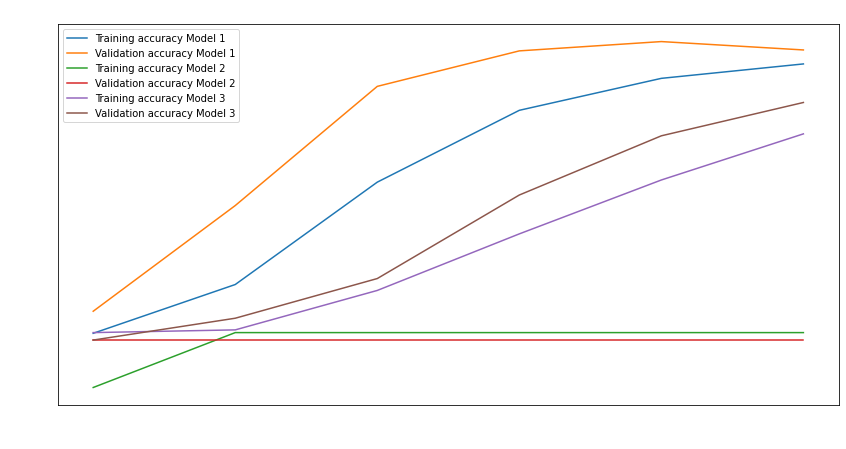

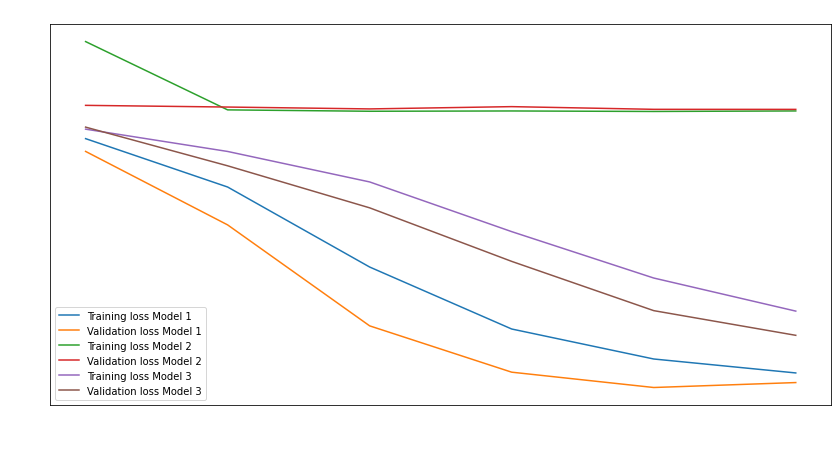

In [ ]:
#Model 1
accuracy_1 = history.history['accuracy']
validation_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
validation_loss_1 = history.history['val_loss']

#Model 2
accuracy_2 = history2.history['accuracy']
validation_acc_2 = history2.history['val_accuracy']
loss_2 = history2.history['loss']
validation_loss_2 = history2.history['val_loss']

#Model 3
accuracy_3 = history3.history['accuracy']
validation_acc_3 = history3.history['val_accuracy']
loss_3 = history3.history['loss']
validation_loss_3 = history3.history['val_loss']

epochs = range(1, len(accuracy_1) + 1)

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', labelsize=12, colors='white')

# Model 1
plt.plot(epochs, accuracy_1, label='Training accuracy Model 1')
plt.plot(epochs, validation_acc_1, label='Validation accuracy Model 1')

# Model 2
plt.plot(epochs, accuracy_2, label='Training accuracy Model 2')
plt.plot(epochs, validation_acc_2, label='Validation accuracy Model 2')

# Model 3
plt.plot(epochs, accuracy_3, label="Training accuracy Model 3")
plt.plot(epochs, validation_acc_3, label='Validation accuracy Model 3')

plt.title('Training and Validation Accuracy', fontdict={'fontsize': 16, 'color': 'white'})
plt.legend()

plt.xlabel('Epochs', fontsize=12, weight='bold', color='white')
plt.ylabel('Accuracy', fontsize=12, weight='bold', color='white')

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', labelsize=12, colors='white')

plt.axis(color='white') # SHOW AXIS OF EPOCH AND ACCURACY

#Model 1
plt.plot(epochs, loss_1, label='Training loss Model 1')
plt.plot(epochs, validation_loss_1, label='Validation loss Model 1')

#Model 2
plt.plot(epochs, loss_2, label='Training loss Model 2')
plt.plot(epochs, validation_loss_2, label='Validation loss Model 2')

#Model 3
plt.plot(epochs, loss_3, label='Training loss Model 3')
plt.plot(epochs, validation_loss_3, label='Validation loss Model 3')

plt.title('Training and Validation Loss', fontdict={'fontsize': 16, 'color': 'white'})
plt.legend()

plt.xlabel('Epochs', fontsize=12, weight='bold', color='white')
plt.ylabel('Accuracy', fontsize=12, weight='bold', color='white')

# score = model.evaluate([images_norm_test], [finger_category_test], verbose=1)
score = model.evaluate([images_norm_test], [gender_category_test], verbose=1)
print("Accuracy Score: ",score[1]*100)

plt.show()

### ENSEMBLE
Now all three models will be combined in an ensemble.
Here, all three models best saved weights are loaded.

In [ ]:
# from keras.models import Input

input_shape = images_train[0,:,:,:].shape
model_input = tf.keras.Input(shape=input_shape)
print(input_shape)
print(model_input)

(96, 96, 1)
Tensor("input_1:0", shape=(None, 96, 96, 1), dtype=float32)


In [ ]:
from tensorflow.python.framework.ops import Tensor

def conv_pool_cnn(model_input: Tensor):
    
    x = tf.keras.layers.Conv2D(96, kernel_size=(3, 3), activation='relu', padding = 'same')(model_input)
    x = tf.keras.layers.Conv2D(96, (3, 3), activation='relu', padding = 'same')(x)
    x = tf.keras.layers.Conv2D(96, (3, 3), activation='relu', padding = 'same')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides = 2)(x)
    x = tf.keras.layers.Conv2D(192, (3, 3), activation='relu', padding = 'same')(x)
    x = tf.keras.layers.Conv2D(192, (1, 1), activation='relu')(x)
    # x = tf.keras.layers.Conv2D(2, (1, 1))(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    # x = tf.keras.layers.Activation(activation='softmax')(x)

    # Layer 3 - Output Layer
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(50, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.20)(x)
    x = tf.keras.layers.Dense(2, activation="sigmoid")(x)
    
    model = tf.keras.Model(model_input, x, name='conv_pool_cnn')
    print(model.summary())
    tf.keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)
    
    return model

In [ ]:
conv_pool_cnn_model = conv_pool_cnn(model_input)

Model: "conv_pool_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 1)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 96, 96, 96)        960       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 96, 96, 96)        83040     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 96, 96, 96)        83040     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 47, 47, 96)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 47, 47, 192)       166080    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 47, 47, 192)     

In [ ]:
import time
epochs = 6 # 20+ gets me an accuracy in the 99.8% range but it takes much longer to train even with a GPU.
batch_size = 34
model_path = '/content/drive/My Drive/CIS-700/Final/conv_pool_cnn_model.h5'

conv_pool_cnn_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"]) # using sparse_categorical

# Set a learning rate
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1),
    tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.0001, verbose=1)
]

# history2 = model2.fit(images_train, fingers_train, batch_size=batch_size, epochs=epochs, 
#                     validation_data = (images_validation, fingers_validation), verbose=1, callbacks=callbacks)
start = time.time()
history_conv_pool_cnn_model = conv_pool_cnn_model.fit(images_train, gender_train, batch_size=batch_size, epochs=epochs,
                      validation_data = (images_validation, gender_validation), verbose=1, callbacks=callbacks)
end = time.time()
print(f'conv_pool_time: {end - start}')

Epoch 1/6
1160/1160 [==============================] - ETA: 0s - loss: 0.4784 - accuracy: 0.8013
Epoch 00001: val_accuracy improved from -inf to 0.79643, saving model to /content/drive/My Drive/CIS-700/Final/conv_pool_cnn_model.h5
1160/1160 [==============================] - 69s 60ms/step - loss: 0.4784 - accuracy: 0.8013 - val_loss: 0.4874 - val_accuracy: 0.7964 - lr: 0.0010
Epoch 2/6
1159/1160 [============================>.] - ETA: 0s - loss: 0.4585 - accuracy: 0.8030
Epoch 00002: val_accuracy improved from 0.79643 to 0.80698, saving model to /content/drive/My Drive/CIS-700/Final/conv_pool_cnn_model.h5
1160/1160 [==============================] - 68s 59ms/step - loss: 0.4585 - accuracy: 0.8030 - val_loss: 0.4613 - val_accuracy: 0.8070 - lr: 0.0010
Epoch 3/6
1159/1160 [============================>.] - ETA: 0s - loss: 0.4413 - accuracy: 0.8105
Epoch 00003: val_accuracy improved from 0.80698 to 0.81256, saving model to /content/drive/My Drive/CIS-700/Final/conv_pool_cnn_model.h5
1160/

In [ ]:
def all_conv_cnn(model_input: Tensor):
    
  x = tf.keras.layers.Conv2D(96, kernel_size=(3, 3), activation='relu', padding = 'same')(model_input)
  x = tf.keras.layers.Conv2D(96, (3, 3), activation='relu', padding = 'same')(x)
  x = tf.keras.layers.Conv2D(96, (3, 3), activation='relu', padding = 'same', strides = 2)(x)
  x = tf.keras.layers.Conv2D(192, (3, 3), activation='relu', padding = 'same')(x)
  x = tf.keras.layers.Conv2D(192, (3, 3), activation='relu', padding = 'same')(x)
  x = tf.keras.layers.Conv2D(192, (1, 1), activation='relu')(x)
  # x = tf.keras.layers.Conv2D(2, (1, 1))(x)
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  # x = tf.keras.layers.Activation(activation='softmax')(x)

      # Layer 3 - Output Layer
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(50, activation="relu")(x)
  x = tf.keras.layers.Dropout(0.20)(x)
  x = tf.keras.layers.Dense(2, activation="sigmoid")(x)
        
  model = tf.keras.Model(model_input, x, name='all_conv_cnn')
  print(model.summary())

    
  return model

In [ ]:
all_conv_cnn_model = all_conv_cnn(model_input)

Model: "all_conv_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 96)        960       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 96)        83040     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 96)        83040     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 192)       166080    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 192)       331968    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 192)      

In [ ]:
def network_in_network_cnn(model_input: Tensor):
    
    #mlpconv block 1
    x = tf.keras.layers.Conv2D(32, (5, 5), activation='relu',padding='valid')(model_input)
    x = tf.keras.layers.Conv2D(32, (1, 1), activation='relu')(x)
    x = tf.keras.layers.Conv2D(32, (1, 1), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    
    #mlpconv block2
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='valid')(x)
    x = tf.keras.layers.Conv2D(64, (1, 1), activation='relu')(x)
    x = tf.keras.layers.Conv2D(64, (1, 1), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    # x = tf.keras.layers.Activation(activation='softmax')(x)
        # Layer 3 - Output Layer
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(50, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.20)(x)
    x = tf.keras.layers.Dense(2, activation="sigmoid")(x)
    
    model = tf.keras.Model(model_input, x, name='network_in_network_cnn')
    print(model.summary())
    
    return model

In [ ]:
network_in_network_cnn_model = network_in_network_cnn(model_input)

Model: "network_in_network_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 1)]       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 92, 92, 32)        832       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 92, 92, 32)        1056      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 92, 92, 32)        1056      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 44, 44, 

In [ ]:
# def evaluate_error(model):
#     pred = model.predict(images_validation, batch_size = 34)
#     pred = np.argmax(pred, axis=1)
#     pred = np.expand_dims(pred, axis=1) # make same shape as y_test
#     error = np.sum(np.not_equal(pred, gender_validation)) / gender_validation.shape[0]    
#     return error

In [ ]:
# evaluate_error(network_in_network_cnn_model)
# p = network_in_network_cnn_model.predict(images_validation, batch_size=34, verbose=1)
# p
# images_train, images_validation, gender_train, gender_validation

290/290 [==============================] - 4s 14ms/step


array([[2.0472299e-23, 1.0000000e+00],
       [2.1283759e-31, 1.0000000e+00],
       [9.0998354e-29, 1.0000000e+00],
       ...,
       [1.5314016e-27, 1.0000000e+00],
       [3.4394598e-28, 1.0000000e+00],
       [2.0452274e-27, 1.0000000e+00]], dtype=float32)

In [ ]:
models = [conv_pool_cnn_model, all_conv_cnn_model, network_in_network_cnn_model]

In [ ]:
print(conv_pool_cnn_model.outputs)
print(all_conv_cnn_model.outputs)
print(network_in_network_cnn_model.outputs)

[<tf.Tensor 'dense_1/Identity:0' shape=(None, 2) dtype=float32>]
[<tf.Tensor 'dense_7/Identity:0' shape=(None, 2) dtype=float32>]
[<tf.Tensor 'dense_3/Identity:0' shape=(None, 2) dtype=float32>]


In [ ]:
def ensemble(models, model_input):
    
    outputs = [model.outputs[0] for model in models]
    y = tf.keras.layers.Average()(outputs)
    y = tf.keras.layers.Dropout(.25)(y)

      # Layer 3 - Output Layer
    # y = tf.keras.layers.Flatten()(y)
    y = tf.keras.layers.GaussianNoise(.5)(y) # adds noise with a standard deviation
    y = tf.keras.layers.Dense(50, activation="relu")(y)
    y = tf.keras.layers.Dropout(0.20)(y)
    y = tf.keras.layers.Dense(2, activation="sigmoid")(y)

    model = tf.keras.Model(model_input, y, name='ensemble')
    print(model.summary())
    print(y)
    
    return model

In [ ]:
ensemble_model = ensemble(models, model_input)
# ensemble_model = ensemble_model.add_loss(losses=tf.abs(tf.reduce_mean(conv_pool_cnn_model)))
# ensemble_model.add_weight()

Model: "ensemble"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 92, 92, 32)   832         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 92, 92, 32)   1056        conv2d_11[0][0]                  
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 92, 92, 32)   1056        conv2d_12[0][0]                  
___________________________________________________________________________________________

In [ ]:
# model_1_weights = tf.keras.Model(model_input, model, name='model_1_weights')

In [ ]:
import time

model_path = '/content/drive/My Drive/CIS-700/Final/Ensemble_Model.h5' #.Model_3.h7

ensemble_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'],
              loss_weights=[1., 0.2, 0.5])

# Set a learning rate
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max', verbose=1),
    tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=2, min_lr=0.0001, verbose=1)
]
start = time.time()
history = ensemble_model.fit(images_train, gender_train,
                             steps_per_epoch=40,
                             batch_size=34,
                             epochs=8, 
                             validation_data = (images_validation, gender_validation), verbose=1, 
                             callbacks=callbacks)
end = time.time()
print(f'ensemble time: {end - start}')
test_scores = ensemble_model.evaluate(images_validation, gender_validation, verbose=1)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Epoch 1/8
40/40 [==============================] - ETA: 0s - loss: 0.6256 - accuracy: 0.7037
Epoch 00001: val_accuracy improved from -inf to 0.79643, saving model to /content/drive/My Drive/CIS-700/Final/Ensemble_Model.h5
40/40 [==============================] - 18s 438ms/step - loss: 0.6256 - accuracy: 0.7037 - val_loss: 0.5648 - val_accuracy: 0.7964 - lr: 0.0010
Epoch 2/8
40/40 [==============================] - ETA: 0s - loss: 0.5237 - accuracy: 0.8118
Epoch 00002: val_accuracy did not improve from 0.79643
40/40 [==============================] - 17s 418ms/step - loss: 0.5237 - accuracy: 0.8118 - val_loss: 0.5176 - val_accuracy: 0.7964 - lr: 0.0010
Epoch 3/8
40/40 [==============================] - ETA: 0s - loss: 0.5530 - accuracy: 0.7794
Epoch 00003: val_accuracy did not improve from 0.79643
40/40 [==============================] - 17s 418ms/step - loss: 0.5530 - accuracy: 0.7794 - val_loss: 0.5171 - val_accuracy: 0.7964 - lr: 0.0010
Epoch 4/8
40/40 [==============================

In [ ]:
# For Ensemble Model
epochs = 2 # 20+ gets me an accuracy in the 99.8% range but it takes much longer to train even with a GPU.
batch_size = 34
model_path = '/content/drive/My Drive/CIS-700/Final/Ensemble_Model.h5' #.Model_3.h7

ensemble_model.compile(optimizer='RMSprop', loss="categorical_crossentropy", metrics=["accuracy"]) # using sparse_categorical

# Set a learning rate
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max', verbose=1),
    tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=2, min_lr=0.0001, verbose=1)
]

history_ensemble = ensemble_model.fit(images_train, gender_train, batch_size=batch_size, epochs=epochs,
                      validation_data = (images_validation, gender_validation), verbose=1, callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


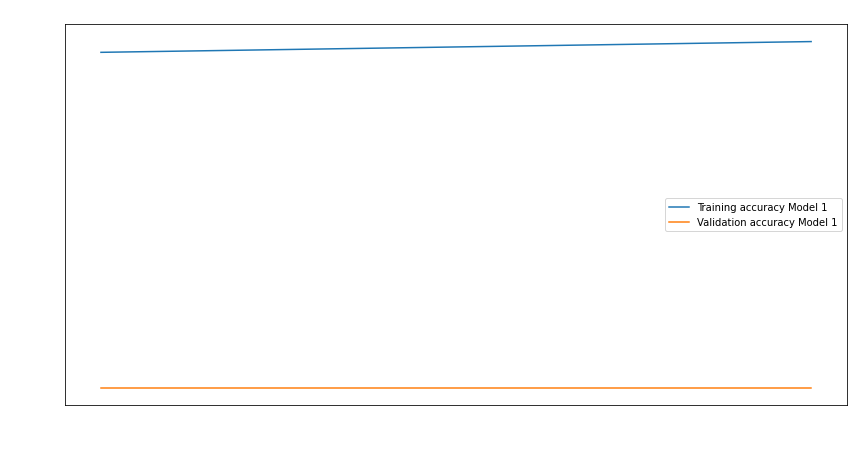

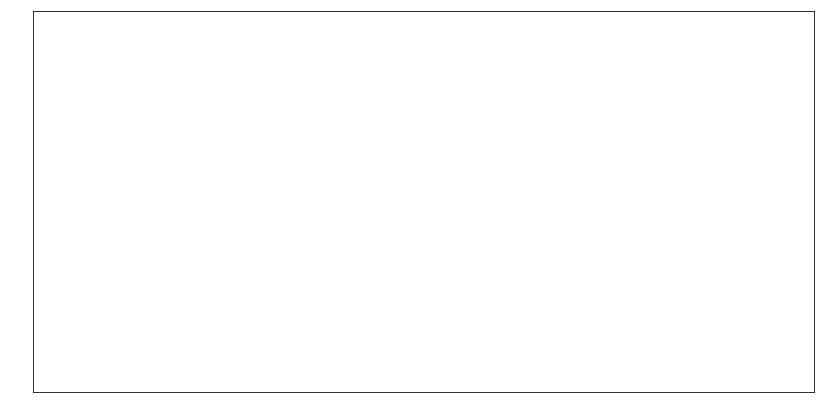

In [ ]:
#Model 1
accuracy_1 = history_ensemble.history['accuracy']
validation_acc_1 = history_ensemble.history['val_accuracy']
loss_1 = history_ensemble.history['loss']
validation_loss_1 = history_ensemble.history['val_loss']

# #Model 2
# accuracy_2 = history2.history['accuracy']
# validation_acc_2 = history2.history['val_accuracy']
# loss_2 = history2.history['loss']
# validation_loss_2 = history2.history['val_loss']

# #Model 3
# accuracy_3 = history3.history['accuracy']
# validation_acc_3 = history3.history['val_accuracy']
# loss_3 = history3.history['loss']
# validation_loss_3 = history3.history['val_loss']

epochs = range(1, len(accuracy_1) + 1)

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', labelsize=12, colors='white')

# Model 1
plt.plot(epochs, accuracy_1, label='Training accuracy Model 1')
plt.plot(epochs, validation_acc_1, label='Validation accuracy Model 1')

# # Model 2
# plt.plot(epochs, accuracy_2, label='Training accuracy Model 2')
# plt.plot(epochs, validation_acc_2, label='Validation accuracy Model 2')

# # Model 3
# plt.plot(epochs, accuracy_3, label="Training accuracy Model 3")
# plt.plot(epochs, validation_acc_3, label='Validation accuracy Model 3')

plt.title('Training and Validation Accuracy', fontdict={'fontsize': 16, 'color': 'white'})
plt.legend()

plt.xlabel('Epochs', fontsize=12, weight='bold', color='white')
plt.ylabel('Accuracy', fontsize=12, weight='bold', color='white')

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', labelsize=12, colors='white')

plt.axis(color='white') # SHOW AXIS OF EPOCH AND ACCURACY

# #Model 1
# plt.plot(epochs, loss_1, label='Training loss Model 1')
# plt.plot(epochs, validation_loss_1, label='Validation loss Model 1')

# #Model 2
# plt.plot(epochs, loss_2, label='Training loss Model 2')
# plt.plot(epochs, validation_loss_2, label='Validation loss Model 2')

# #Model 3
# plt.plot(epochs, loss_3, label='Training loss Model 3')
# plt.plot(epochs, validation_loss_3, label='Validation loss Model 3')

# plt.title('Training and Validation Loss', fontdict={'fontsize': 16, 'color': 'white'})
# plt.legend()

# plt.xlabel('Epochs', fontsize=12, weight='bold', color='white')
# plt.ylabel('Accuracy', fontsize=12, weight='bold', color='white')

# # score = model.evaluate([images_norm_test], [finger_category_test], verbose=1)
# score = ensemble_model.evaluate([images_norm_test], [gender_category_test], verbose=1)
# print("Accuracy Score: ",score[1]*100)

plt.show()

In [ ]:
# pickle write history_ensemble

# date_of_launch = str(datetime.date.today())
# fileObject = open('/content/drive/My Drive/CIS-700/Final/pickled_history_ensemble' + date_of_launch + '.pickle', 'wb')
# pickle.dump(history_ensemble, fileObject)
# fileObject.close()


In [ ]:
# pickle read history_ensemble
# fileObject = open('/content/drive/My Drive/CIS-700/Final/pickled_history_ensemble2020-06-06.pickle', 'rb')
# history_ensemble = pickle.load(fileObject)
# fileObject.close()
# history_ensemble

In [ ]:
# print(fingers.shape)
# print(fingers_test.shape)
print(images_norm.shape)
print(images_norm_test.shape)
print(images_validation.shape)
# print(fingers_validation.shape)

(49270, 96, 96, 1)
(6000, 96, 96, 1)
(9854, 96, 96, 1)


In [ ]:
predictions = model.predict(images_norm_test, batch_size=35)
predictions.shape

(6000, 2)

In [ ]:
print(predictions[3])
print(gender_labels[3])

[9.9996066e-01 3.9337483e-05]
0


In [ ]:
# # confusion_matrix = tfa.metrics.MultiLabelConfusionMatrix(num_classes=5)
# # confusion_matrix.update_state(finger_labels_test, predictions)
# confusion_matrix = tf.math.confusion_matrix(gender_labels, predictions)
# # confusion_matrix.update_state(gender_labels_test, predictions)
# confusion_matrix

In [ ]:
confusion_matrix.result()[0]

In [ ]:
#Confusion Matrix HeatMap of all five labels.
figure = plt.figure(figsize=(6, 6))
for i in range(5):
  sn.heatmap(confusion_matrix.result()[i], annot=True, cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label', color='white')
  plt.xlabel('Predicted label', color='white')
  plt.show()

In [ ]:
predictions[0]

Assignment 2 Question 1 - Scatterplot

In [ ]:
finger_label_list = ['thumb', 'index', 'middle', 'ring', 'pinky']

In [ ]:
# # Draw a scatter plot
# plt.subplots(figsize=(7, 7))
# plt.xlabel('Finger Label', c='white')
# plt.scatter(finger_label_list, predictions[0] )
# plt.scatter(finger_label_list, predictions[1] )
# plt.scatter(finger_label_list, predictions[2] )
# # sn.scatterplot(data=predictions[0])
# # sn.stripplot(data=predictions)
# # plt.figure(figsize=(15,7))
# plt.title("Predicted Digits", c='white')
# plt.show()

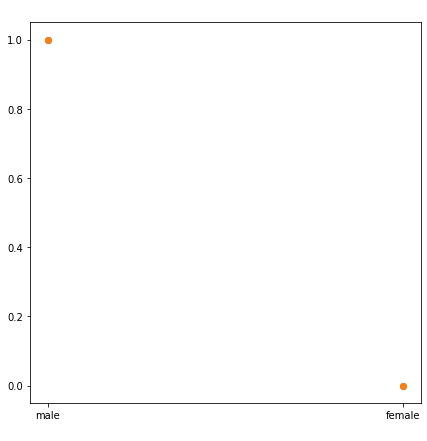

In [ ]:
gender_label_list = ['male', 'female']
plt.subplots(figsize=(7, 7))
plt.xlabel('Gender Label', c='white')
plt.scatter(gender_label_list, predictions[0] )
plt.scatter(gender_label_list, predictions[1] )
plt.title("Predicted Gender", c='white')
plt.show()


In [ ]:
images_2_norm.shape

(49270, 96, 96)

In [ ]:
images_2_norm[0]

array([[0.62745098, 0.61960784, 0.61960784, ..., 0.        , 0.        ,
        0.        ],
       [0.62745098, 0.41176471, 0.4745098 , ..., 0.        , 0.        ,
        0.        ],
       [0.62745098, 0.41176471, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# future pca work
train_img = pca.transform(images_2_norm[0])
train_lbl = pca.transform(images_2_test_norm[0])
print(train_img.shape)
print(train_lbl.shape)

(96, 23)
(96, 23)


In [ ]:
# from sklearn.linear_model import LogisticRegression
# # all parameters not specified are set to their defaults
# # default solver is incredibly slow which is why it was changed to 'lbfgs'
# logisticRegr = LogisticRegression(solver = 'lbfgs')
# logisticRegr.fit(train_img, train_lbl)

In [ ]:
# Predict for One Observation (image)
# logisticRegr.predict(test_img[0].reshape(1,-1))

In [ ]:
images_train[0].shape

(96, 96, 1)